Imports and Setup

In [8]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

# For better display in notebooks
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

Data Loading

In [4]:
# Try reading the dataset with different encodings
encodings = ['utf-8', 'latin1', 'iso-8859-1', 'cp1252']

for encoding in encodings:
    try:
        print(f"Trying encoding: {encoding}")
        df = pd.read_csv('../data/external/mendeley_sri_lanka_reviews.csv', encoding=encoding)
        print(f"Successfully read the file with {encoding} encoding")
        break
    except UnicodeDecodeError:
        print(f"Failed with {encoding} encoding")
        continue

Trying encoding: utf-8
Failed with utf-8 encoding
Trying encoding: latin1
Successfully read the file with latin1 encoding


Basic Dataset Information

In [5]:
# Display basic information about the dataset
print("Dataset Info:")
print("-" * 50)
print(df.info())
print(f"Shape: {df.shape}")
print("\nFirst few rows:")
print("-" * 50)
display(df.head())

print("\nBasic statistics:")
print("-" * 50)
display(df.describe())

print("\nColumns in the dataset:")
print("-" * 50)
print(df.columns.tolist())

Dataset Info:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16156 entries, 0 to 16155
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Location_Name       16156 non-null  object
 1   Located_City        16156 non-null  object
 2   Location            16156 non-null  object
 3   Location_Type       16156 non-null  object
 4   User_ID             16156 non-null  object
 5   User_Location       16156 non-null  object
 6   User_Locale         16156 non-null  object
 7   User_Contributions  16156 non-null  int64 
 8   Travel_Date         16156 non-null  object
 9   Published_Date      16156 non-null  object
 10  Rating              16156 non-null  int64 
 11  Helpful_Votes       16156 non-null  int64 
 12  Title               16156 non-null  object
 13  Text                16156 non-null  object
dtypes: int64(3), object(11)
memory usage: 1.7+ MB
None
Sh

,Location_Name,Located_City,Location,Location_Type,User_ID,User_Location,User_Locale,User_Contributions,Travel_Date,Published_Date,Rating,Helpful_Votes,Title,Text
0,Arugam Bay,Arugam Bay,"Arugam Bay, Eastern Province",Beaches,User 1,"Dunsborough, Australia",en_US,8,2019-07,2019-07-31T07:53:21-04:00,5,1,Best nail spa in Arugam bay on the water!,I had a manicure here and it really was professional and clean. It is right on the Ocean so ver...
1,Arugam Bay,Arugam Bay,"Arugam Bay, Eastern Province",Beaches,User 2,"Bendigo, Australia",en_US,4,2019-06,2019-07-21T21:50:11-04:00,4,0,Best for surfing,"Overall, it is a wonderful experience. We visited Arugam bay last month during our anniversary. ..."
2,Arugam Bay,Arugam Bay,"Arugam Bay, Eastern Province",Beaches,User 3,"Melbourne, Australia",en_US,13,2019-07,2019-07-15T18:52:55-04:00,5,0,We Love Arugam Bay,"Great place to chill, swim, surf, eat, shop, have sunset cocktails, itÂs the best!!! The vibe i..."
3,Arugam Bay,Arugam Bay,"Arugam Bay, Eastern Province",Beaches,User 4,"Ericeira, Portugal",en_US,4,2019-06,2019-07-03T10:32:41-04:00,5,0,Sun and waves.,Good place for surf and a few stores to going for shopping. Very good place for rest and surf. G...
4,Arugam Bay,Arugam Bay,"Arugam Bay, Eastern Province",Beaches,User 5,"Pistoia, Italy",en_US,14,2019-07,2019-07-02T17:07:02-04:00,5,0,"Great swimming, surfing, great fish aznd friendly people",This place is great for surfing but even if you are not a surfer you can have a wonderful time s...



Basic statistics:
--------------------------------------------------


,User_Contributions,Rating,Helpful_Votes
count,16156.000000,16156.000000,16156.000000
mean,191.624845,4.167492,0.709458
std,500.100421,1.006840,3.672513
min,1.000000,1.000000,0.000000
25%,18.000000,4.000000,0.000000
50%,54.000000,4.000000,0.000000
75%,155.000000,5.000000,1.000000
max,9010.000000,5.000000,233.000000



Columns in the dataset:
--------------------------------------------------
['Location_Name', 'Located_City', 'Location', 'Location_Type', 'User_ID', 'User_Location', 'User_Locale', 'User_Contributions', 'Travel_Date', 'Published_Date', 'Rating', 'Helpful_Votes', 'Title', 'Text']


Review Content Analysis

In [6]:
# Analyze review text characteristics
df['text_length'] = df['Text'].str.len()
df['text_word_count'] = df['Text'].str.split().str.len()
df['title_length'] = df['Title'].str.len()
df['title_word_count'] = df['Title'].str.split().str.len()

print("Review Content Statistics:")
print("-" * 50)
print(f"Average text length: {df['text_length'].mean():.0f} characters")
print(f"Average text word count: {df['text_word_count'].mean():.0f} words")
print(f"Average title length: {df['title_length'].mean():.0f} characters")
print(f"Average title word count: {df['title_word_count'].mean():.0f} words")
print(f"\nText length range: {df['text_length'].min()} - {df['text_length'].max()} characters")
print(f"Word count range: {df['text_word_count'].min()} - {df['text_word_count'].max()} words")

Review Content Statistics:
--------------------------------------------------
Average text length: 381 characters
Average text word count: 70 words
Average title length: 25 characters
Average title word count: 4 words

Text length range: 50 - 9430 characters
Word count range: 1 - 1700 words


Text Length Visualizations

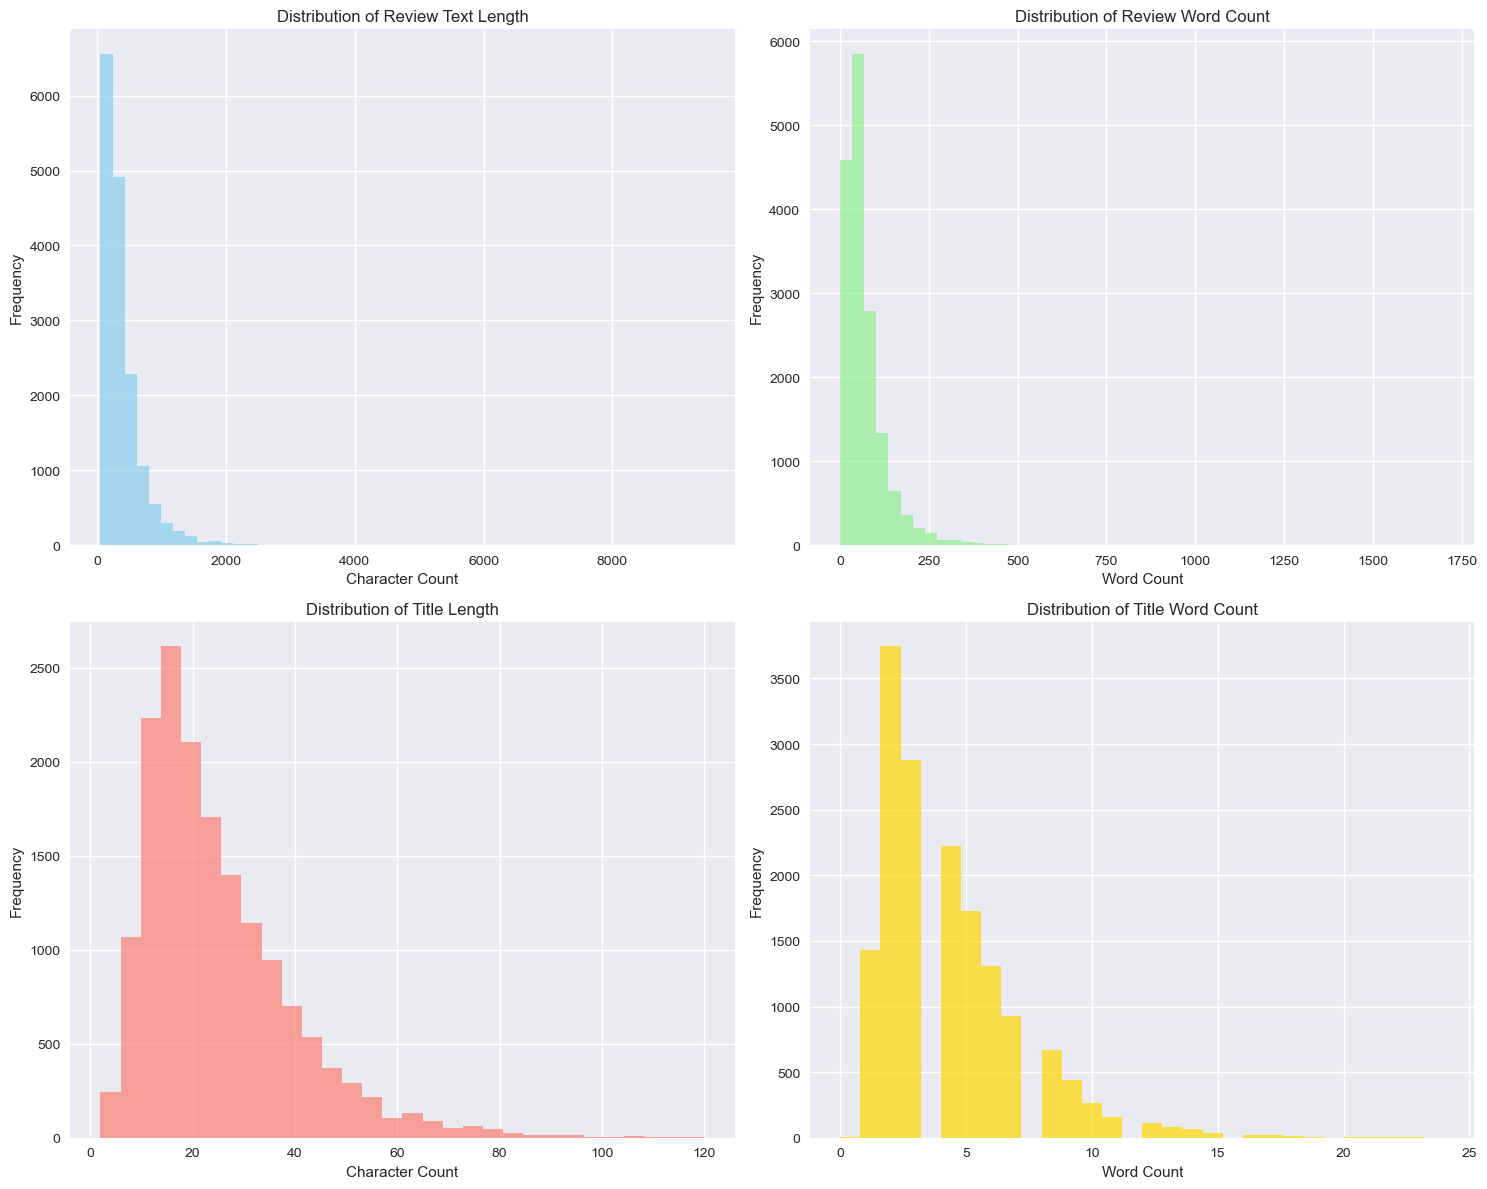

In [7]:
# Visualize text length distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Text length distribution
axes[0,0].hist(df['text_length'], bins=50, alpha=0.7, color='skyblue')
axes[0,0].set_title('Distribution of Review Text Length')
axes[0,0].set_xlabel('Character Count')
axes[0,0].set_ylabel('Frequency')

# Word count distribution
axes[0,1].hist(df['text_word_count'], bins=50, alpha=0.7, color='lightgreen')
axes[0,1].set_title('Distribution of Review Word Count')
axes[0,1].set_xlabel('Word Count')
axes[0,1].set_ylabel('Frequency')

# Title length distribution
axes[1,0].hist(df['title_length'], bins=30, alpha=0.7, color='salmon')
axes[1,0].set_title('Distribution of Title Length')
axes[1,0].set_xlabel('Character Count')
axes[1,0].set_ylabel('Frequency')

# Title word count distribution
axes[1,1].hist(df['title_word_count'], bins=30, alpha=0.7, color='gold')
axes[1,1].set_title('Distribution of Title Word Count')
axes[1,1].set_xlabel('Word Count')
axes[1,1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()